# SciPy를 사용한 기초적인 검정

SciPy 파이썬 패키지는 다음과 같은 다양한 검정 명령을 제공한다. 

* 이항 검정 (Binomial test)
* 카이 제곱 검정 (Chi-square test)
* 단일 표본 z-검정 (One-sample z-test)
* 단일 표본 t-검정 (One-sample t-test)
* 독립 표본 t-검정 (Independent-two-sample t-test)
* 대응 표본 t-검정 (Paired-two-sample t-test)
* 분산 검정 (Chi squared variance test)
* 등분산 검정 (Equal-variance test)
* 정규성 검정 (Normality test)

## 이항 검정 (Binomial test)

이항 검정은 이항 분포를 이용하여 Bernoulli 분포 모수 $\mu$에 대한 가설을 조사하는 검정 방법이다. SciPy stats 서브패키지의 `binom_test` 명령은 이항 검정의 유의 확률을 계산한다. 디폴트 귀무 가설은 $\mu = 0.5$이다.

* scipy.stats.binom_test
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html

데이터 갯수 $N=10$, 실제 모수 $\mu_0=0.5$인 경우 대해 이항 검정 명령을 실시해 보자.

In [1]:
N = 10
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

7

In [2]:
sp.stats.binom_test(n, N)

0.3437499999999999

유의 확률(p-value)이 34%로 높으므로 귀무 가설을 기각할 수 없다. 따라서 $\mu=0.5$이다.

이번에는 데이터 갯수 $N=100$, 실제 모수 $\mu_0=0.5$인 경우 대해 이항 검정 명령을 실시해 보자.

In [3]:
N = 100
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [4]:
sp.stats.binom_test(n, N)

0.9204107626128206

유의 확률(p-value)이 92%로 높으므로 귀무 가설을 기각할 수 없다. 따라서 $\mu=0.5$이다.

마지막으로 데이터 갯수 $N=100$, 실제 모수 $\mu_0=0.35$인 경우 대해 이항 검정 명령을 실시해 보자.

In [5]:
N = 100
mu_0 = 0.35
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

31

In [6]:
sp.stats.binom_test(n, N)

0.00018314322488235352

유의 확률(p-value)이 0.018%로 낮으므로 귀무 가설을 기각할 수 있다. 따라서 $\mu \neq 0.5$이다.

#### 연습 문제 1

1. N = 10이고  유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야지 동전이 공정하지 않다고 이야기 할 수 있을까?
2. N = 1000이고  유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야지 동전이 공정하지 않다고 이야기 할 수 있을까? 이 때 공정하다고 이야기할 수 있는 경우의 범위는 N=10일 때와 비교하여 넓은가 혹은 좁은가?

#### 연습 문제 2

N = 100이고  앞면이 나온 횟수는 40번이다. 유의 수준이 1%라면 앞면이 나온 횟수가 몇 번이어야지 $\mu = 0.4$라고 이야기 할 수 있을까?

#### 연습 문제 3

다음 코드를 실행하면 어느 식당의 판매 기록을 구할 수 있다. 하나의 레코드(행)이 한 명의 손님을 나타낸다고 가정하자. 다른 열에는 성별(sex), 흡연유무(smoker), 점심/저녁(time) 등을 나타내는 데이터가 있다. 이항 검정을 사용하여 다음 문제를 풀어라.

```
import seaborn as sns
tips = sns.load_dataset("tips")
```

1. 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?
2. 저녁에 오는 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

## 카이 제곱 검정 (Chi-square test)

카이 제곱 검정은 goodness of fit 검정이라고도 부른다. 카테고리 분포의 모수 $\mu=(\mu_1, \ldots, \mu_K)$에 대한 가설을 조사하는 검정 방법이다. 원래 카테고리 $k$가 나와야 할 횟수의 기댓값 $m_k$와 실제 나온 횟수 $x_k$의 차이를 이용하여 다음처럼 검정 통계량을 구한다.

$$ \sum_{k=1}^K \dfrac{(x_k - m_k)^2}{m_k} $$

SciPy stats 서브패키지의 `chisquare` 명령은 카이 제곱 검정의 검정 통계량과 유의 확률을 계산한다. 디폴트 귀무 가설은 $\mu = \left(\frac{1}{K}, \ldots, \frac{1}{K} \right)$이다.

* scipy.stats.chisquare
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html   

데이터 갯수 $N=10$, 실제 모수 $\mu_0=(0.25, 0.25, 0.25, 0.25)$인 경우 대해 카이 제곱 검정 명령을 실시해 보자.

In [7]:
N = 10
K = 4
mu_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2])

In [8]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

유의 확률(p-value)이 17.8%로 높으므로 귀무 가설을 기각할 수 없다. 따라서 $\mu_0=(0.25, 0.25, 0.25, 0.25)$이다.

이번에는 데이터 갯수 $N=100$, 실제 모수 $\mu_0=(0.35, 0.30, 0.20, 0.15)$인 경우 대해 카이 제곱 검정 명령을 실시해 보자.

In [9]:
N = 100
K = 4
mu_0 = np.array([0.35, 0.30, 0.20, 0.15])
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([37, 32, 20, 11])

In [10]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=16.56, pvalue=0.0008703471978912127)

유의 확률(p-value)이 0.087%이므로 귀무 가설을 기각할 수 있다. 따라서 $\mu \neq (0.25, 0.25, 0.25, 0.25))$이다.

#### 연습 문제 4

4면체 주사위를 10번 던졌다. 만약 10번 모두 1이 나왔다면 주사위가 공정하다는 귀무 가설의 유의 확률은 얼마인가?

**카이 제곱 검정은 어떤 카테고리 변수 $X$가 다른 카테고리 변수 $Y$와 상관 관계를 가지는가를 검증**하는데도 사용할 수 있다. 만약 카테고리 변수 $X$의 값이 0일 때의 $Y$의 분포와 카테고리 변수 $X$의 값이 1일 때의 $Y$의 분포가 많이 다르다면 카테고리 변수 $X$는 카테고리 변수 $Y$에 영향을 미치고 있다, 즉 상관 관계를 가진다는 뜻이다. 

SciPy의 ``chi2_contingency`` 명령은 이러한 검정을 수행한다. $X$의 값에 따른 각각의 $Y$의 분포가 2차원 표(contingency table)의 형태로 주어지면 y 분포의 평균 분포와 실제 y 분포의 차이를 검정 통계량으로 계산한다. 이 값이 충분히 크다면 $X$와 $Y$는 상관 관계가 있다. ``chi2_contingency`` 명령의 결과는 튜플로 반환되며 첫번째 값이 검정 통계량, 두번째 값이 유의 확률이다.

예를 들어 $X$가 0일 때 $Y$가 $10, 10, 20$이었고 $X$가 1일 때 $Y$가 $20, 20, 20$이면 카이 제곱 검정의 유의 확률은 다음처럼 24.9%가 나온다. 즉 $X$와 $Y$는 상관 관계가 없다.

In [11]:
obs = np.array([[10, 10, 20], [20, 20, 20]])
sp.stats.chi2_contingency(obs)

(2.7777777777777777, 0.24935220877729622, 2, array([[12., 12., 16.],
        [18., 18., 24.]]))

#### 연습 문제 5

다음 코드를 실행하면 식당 손님의 성별과 요일에 따른 방문객수를 나타내는 표를 구할 수 있다.
```
import seaborn as sns
tips = sns.load_dataset("tips")
tips.pivot_table(index="sex", columns="day", aggfunc="size")
```

이 결과에 따르면 성별에 따라 식당을 많이 방문하는 요일이 달라진다고 이야기할 수 있는가?

## 단일 표본 z-검정 (One-sample z-test)

단일 표본 z-검정은 분산 $\sigma^2$의 값을 정확히 알고 있는 정규 분포의 표본에 대해 기댓값을 조사하는 검정방법이다. 단일 표본 z-검정의 경우에는 SciPy에 별도의 함수가 준비되어 있지 않으므로 `norm` 명령의 `cdf` 메서드를 사용하여 직접 구현해야 한다.

* scipy.stats.norm
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

데이터 갯수 $N=10$, 실제 모수 $\mu_0=0$인 경우 대해 단일 표본 z-검정 명령을 실시해 보자.

In [12]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

단일 표본 z-검정 함수를 다음처럼 구현할 수 있다. 이 함수는 검정 통계량과 유의 확률을 반환한다.

In [13]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu) / np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

In [14]:
ztest_1samp(x)

(2.3338341854824276, 0.019604406021683538)

유의 확률(p-value)이 1.96%이므로 만약 유의 수준이 5% 이상 이라면 귀무 가설을 기각할 수 있다. 따라서 $\mu \neq 0$이다. 이 경우는 검정 결과가 오류인 예라고 볼 수 있다. 검정 결과가 오류로 나온 이유는 데이터 수가 10개로 부족하기 때문이다.

오류의 유형 중에서 이러한 오류는 귀무 가설이 진실임에도 불구하고 거짓으로 나온 경우로 **유형 1 오류(Type 1 Error)**라고 한다.

데이터 갯수 $N=100$, 실제 모수 $\mu_0=0$인 경우 대해 단일 표본 z-검정 명령을 실시해 보자.

In [15]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)

In [16]:
ztest_1samp(x)

(0.5980801553448499, 0.5497864508624168)

유의 확률(p-value)이 54.98%이므로 귀무 가설을 기각할 수 없다. 따라서 $\mu = 0$이다. 

## 단일 표본 t-검정 (One-sample t-test)

단일 표본 t-검정은 정규 분포의 표본에 대해 기댓값을 조사하는 검정방법이다. SciPy의 stats 서브 패키지의 `ttest_1samp` 명령을 사용한다.  `ttest_1samp` 명령의 경우에는 디폴트 모수가 없으므로 `popmean` 인수를 사용하여 직접 지정해야 한다.


* scipy.stats.ttest_1samp
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

데이터 갯수 $N=10$, 실제 모수 $\mu_0=0$인 경우 대해 단일 표본 z-검정 명령을 실시해 보자.

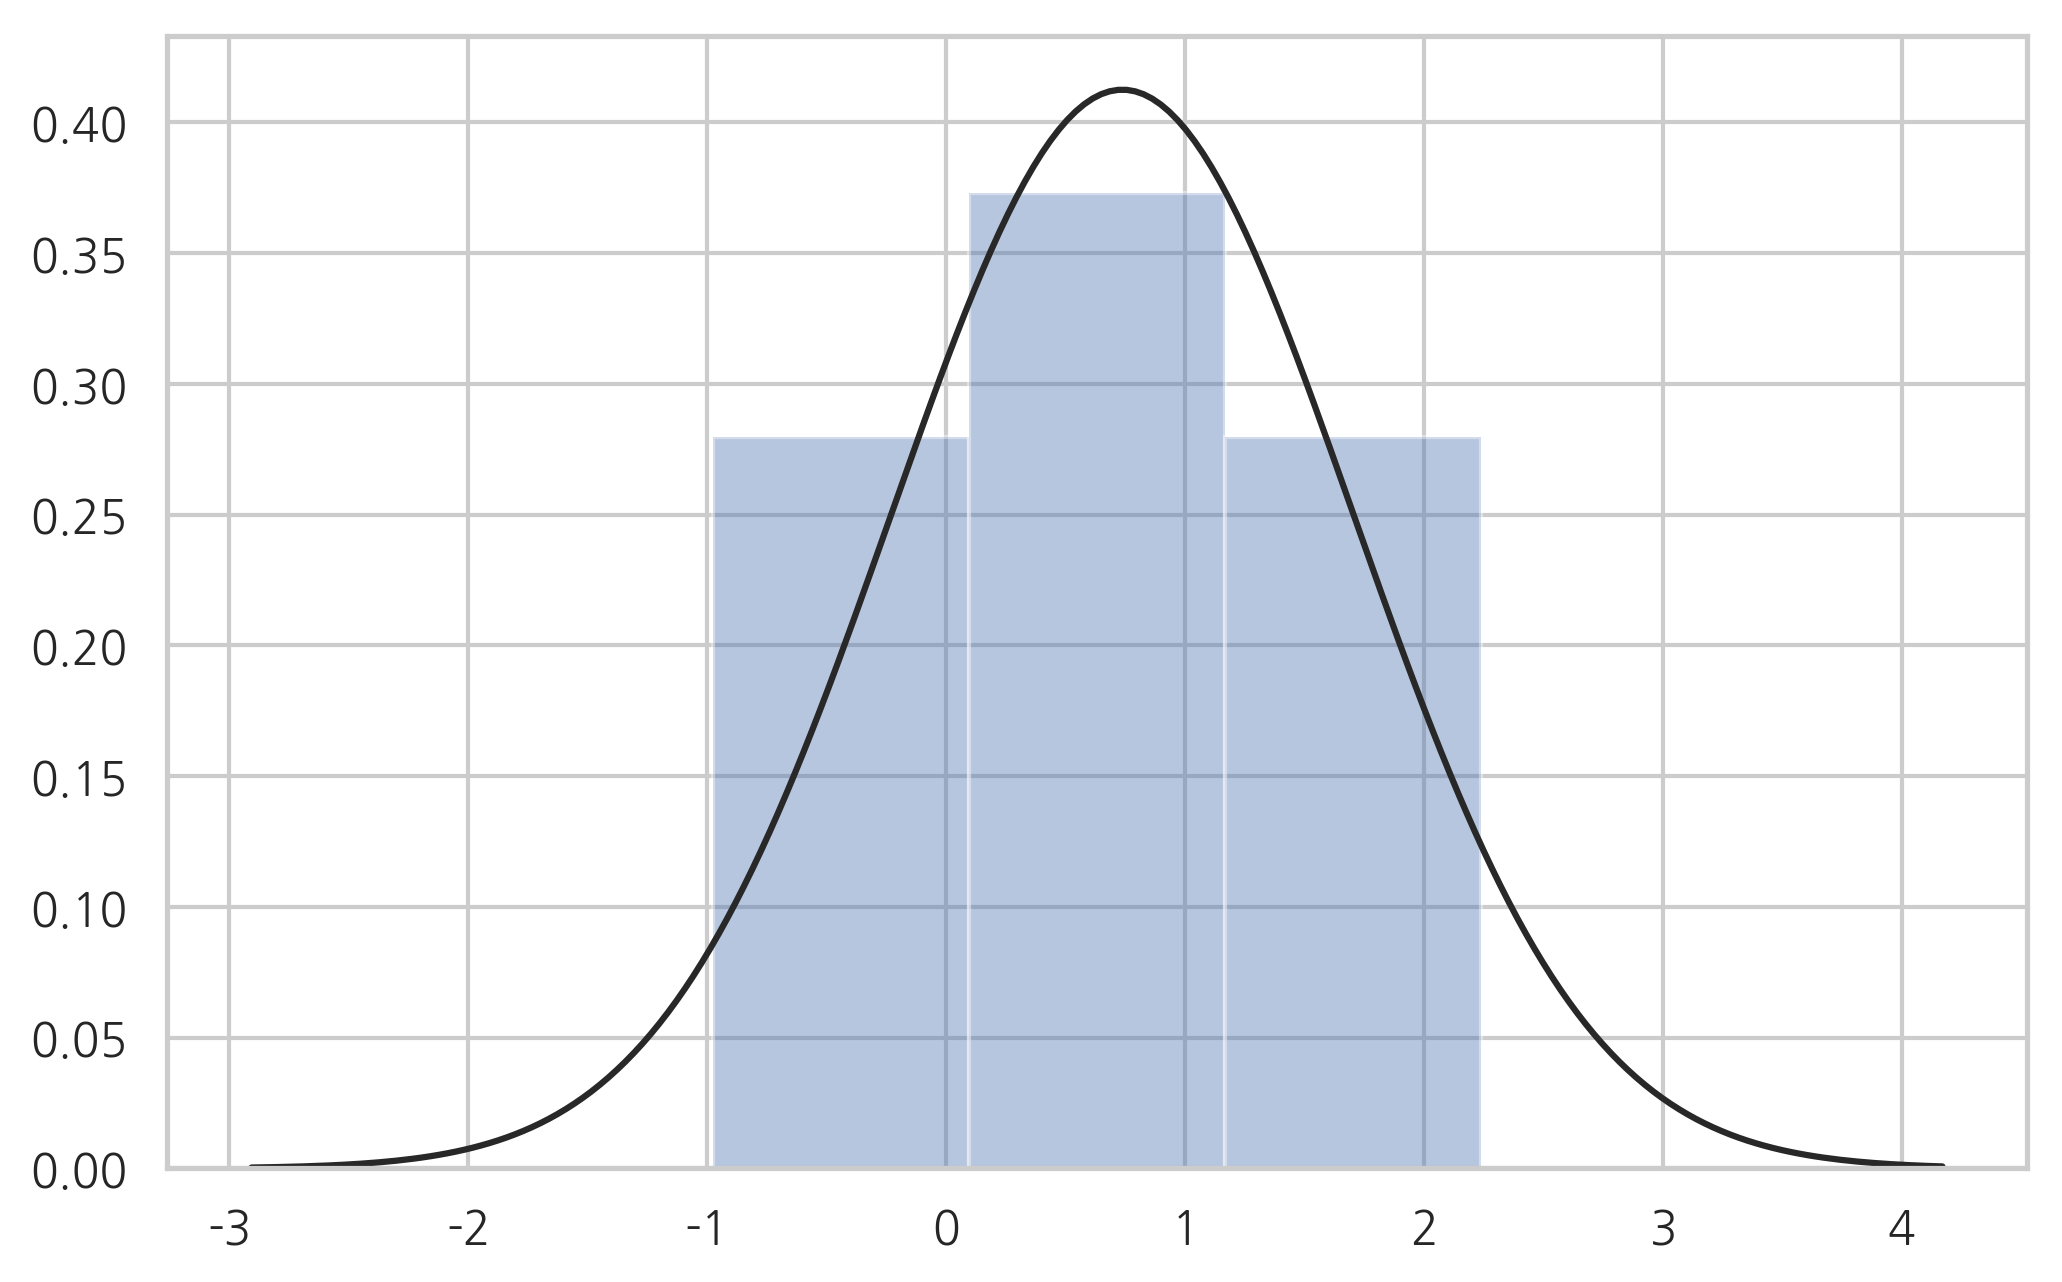

In [17]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [18]:
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=2.28943967238967, pvalue=0.04781846490857058)

유의 확률(p-value)이 4.78%이므로 만약 유의 수준이 5% 이상 이라면 귀무 가설을 기각할 수 있다. 따라서 $\mu \neq 0$이다. 이 경우는 검정 결과가 오류인 예라고 볼 수 있다. 검정 결과가 오류로 나온 이유는 데이터 수가 10개로 부족하기 때문이다.

데이터 갯수 $N=100$, 실제 모수 $\mu_0=0$인 경우 대해 단일 표본 z-검정 명령을 실시해 보자.

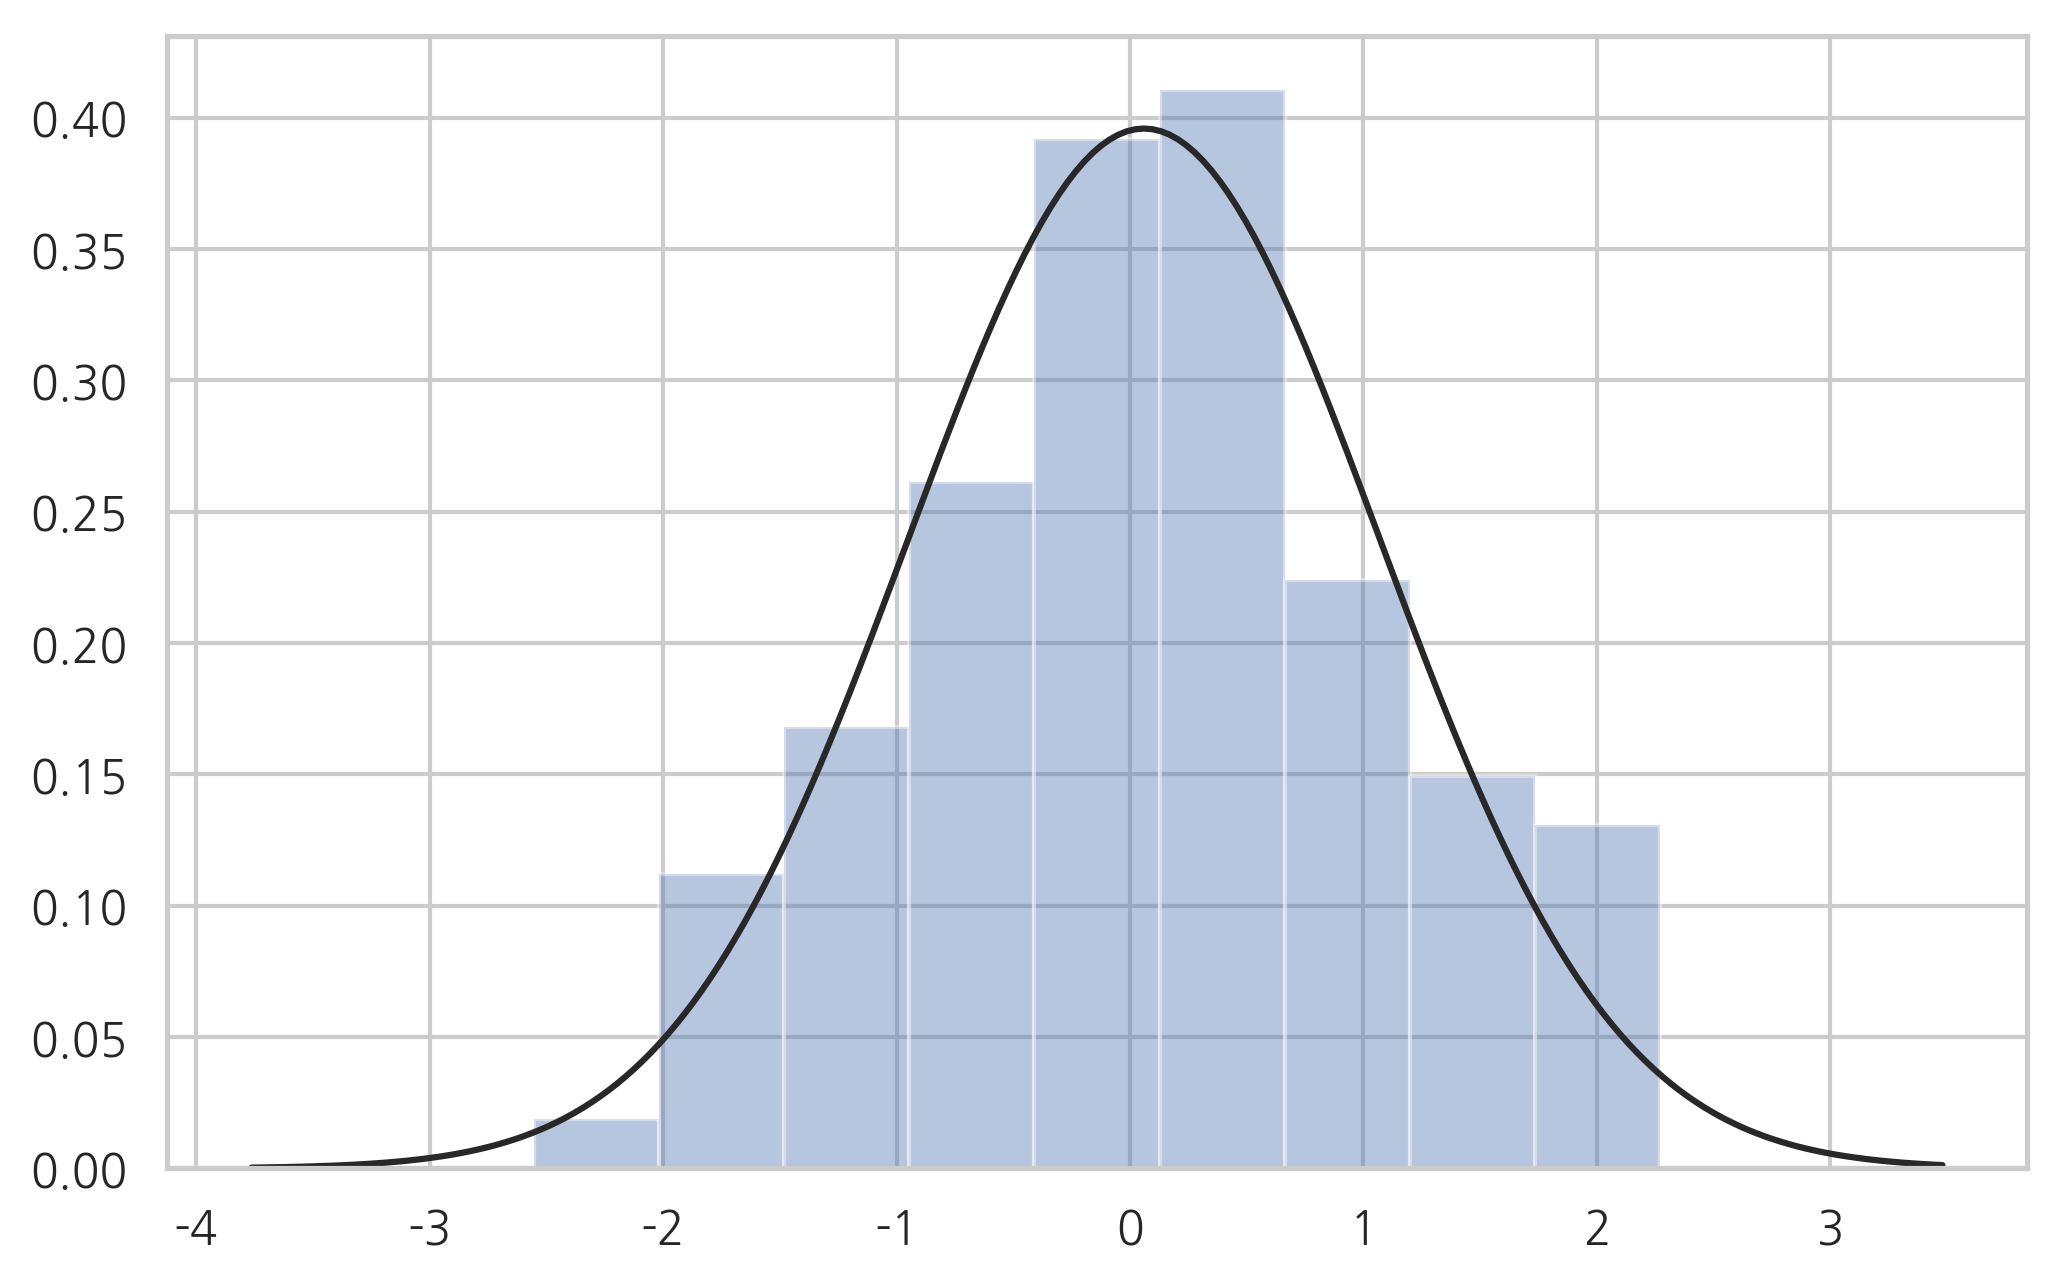

In [19]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [20]:
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=0.5904283402851698, pvalue=0.5562489158694675)

유의 확률(p-value)이 55.62%이므로 귀무 가설을 기각할 수 없다. 따라서 $\mu = 0$이다. 

## 독립 표본 t-검정 (Independent-two-sample t-test)

독립 표본 t-검정(Independent-two-sample t-test)은 간단하게 two sample t-검정이라고도 한다. 두 개의 독립적인 정규 분포에서 나온 두 개의 데이터 셋을 사용하여 두 정규 분포의 기댓값이 동일한지를 검사한다. SciPy stats 서브패키지의 `ttest_ind` 명령을 사용한다. 독립 표본 t-검정은 두 정규 분포의 분산값이 같은 경우와 같지 않은 경우에 사용하는 검정 통계량이 다르기 때문에  `equal_var` 인수를 사용하여 이를 지정해 주어야 한다.

* scipy.stats.ttest_ind
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

두 정규 분포의 기댓값이 $\mu_1 = 0$, $\mu_2 = 0.5$로 다르고  분산은 $\sigma_1 = \sigma_2 = 1$ 으로 같으며 샘플의 수가 $N_1=N_2=10$인 경우를 실행해 보자

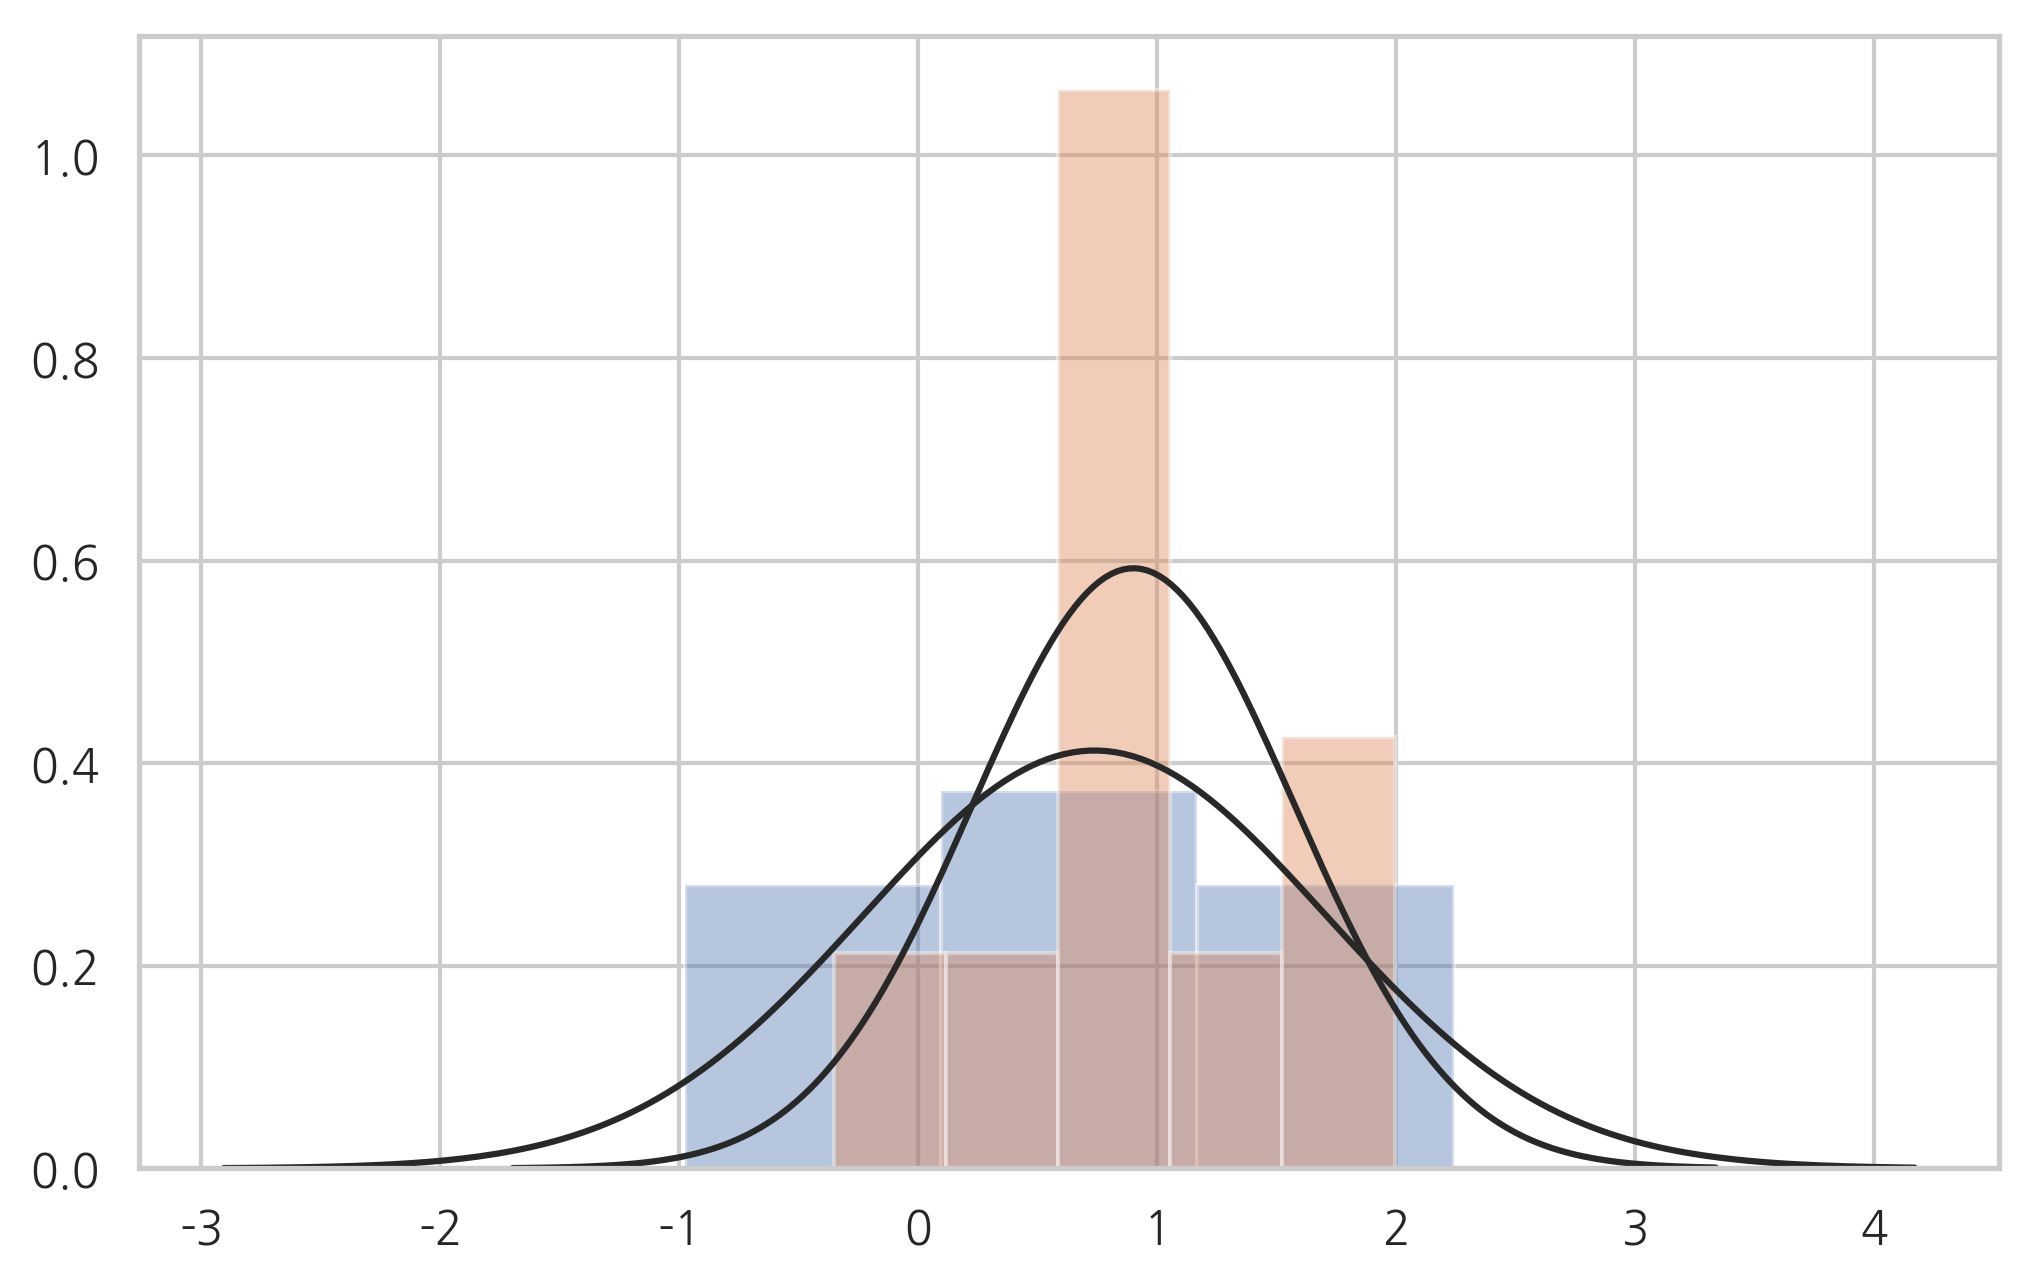

In [21]:
N_1 = 10
mu_1 = 0
sigma_1 = 1
N_2 = 10
mu_2 = 0.5
sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [22]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-0.4139968526988655, pvalue=0.6837676894116427)

유의 확률(p-value)이 68.4%이므로 귀무 가설을 기각할 수 없다. 따라서 $\mu_1 = \mu_2$이다. 이 경우는 검정 결과가 오류인 예라고 볼 수 있다. 

오류의 유형 중에서 이러한 오류는 귀무 가설이 거짓임에도 불구하고 진실로 나온 경우로 **유형 2 오류(Type 2 Error)**라고 한다.

데이터 수가 증가하면 이러한 오류가 발생할 가능성이 줄어든다.

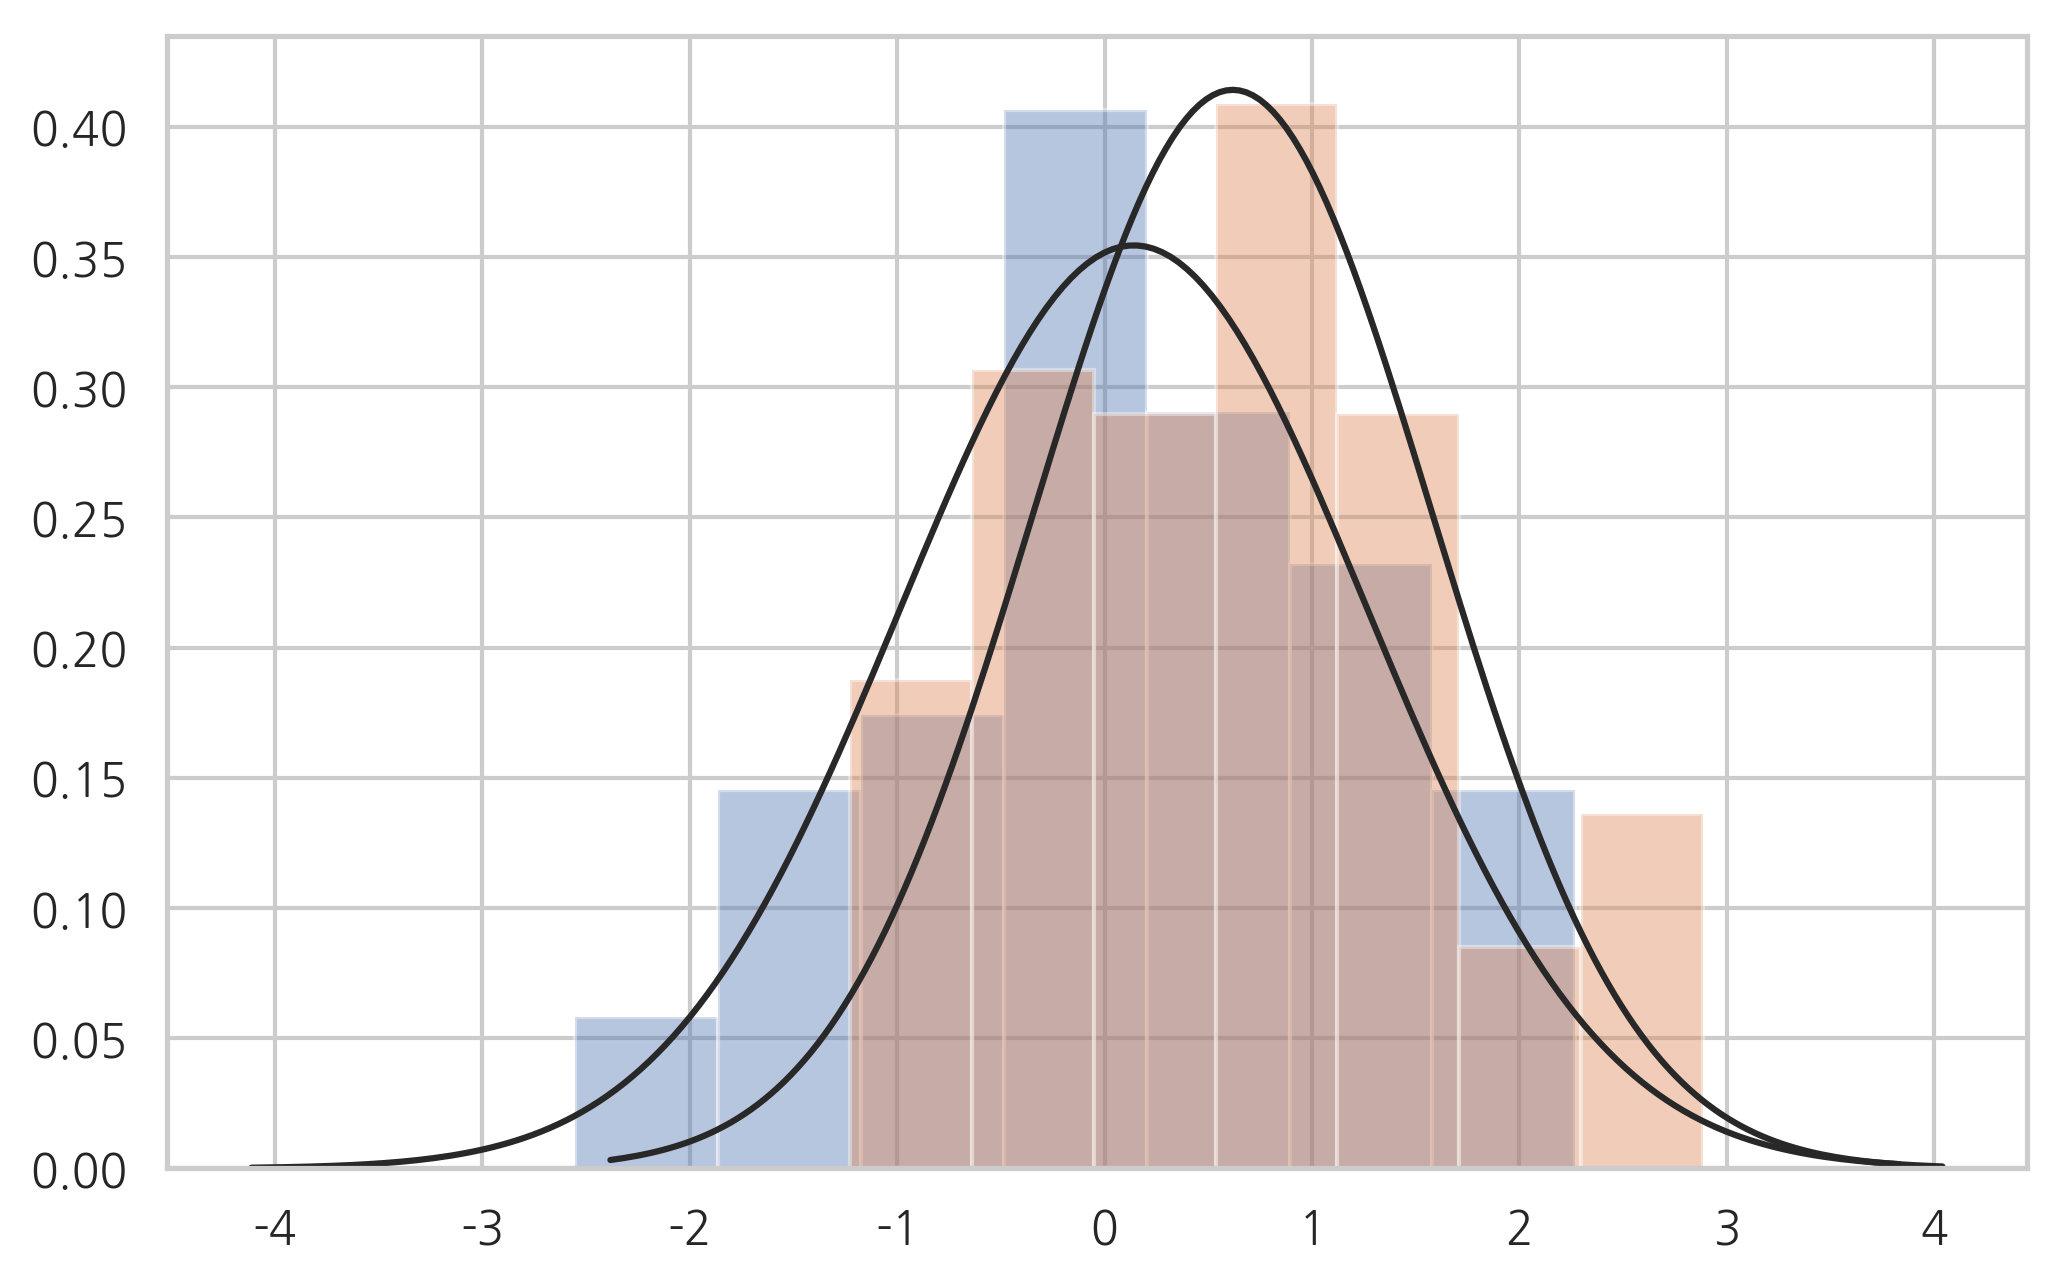

In [23]:
N_1 = 50
mu_1 = 0
sigma_1 = 1
N_2 = 100
mu_2 = 0.5
sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [24]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-2.6826951236616963, pvalue=0.008133970915722658)

데이터의 갯수를 50개와 100개로 증가시킨 경우에 유의 확률은 0.8%로 감소하였다. 따라서 두 확률 분포의 기댓값이 일치한다는 귀무 가설은 기각할 수 있다.

#### 연습 문제 6

1반과 2반 학생 들의 성적이 각각 다음과 같다고 가정하자.

* 1반 : 80점, 75점, 85점, 50점, 60점, 75점, 45점, 70점, 90점, 95점, 85점, 80점,  
* 2반 : 80점, 85점, 70점, 80점, 35점, 55점, 80점 

1반의 실력이 2반보다 좋다고 이야기 할 수 있는가?

## 대응 표본 t-검정 (Paired-two-sample t-test)

대응 표본 t-검정은 독립 표본 t-검정을 두 집단의 샘플이 1대1 대응하는 경우에 대해 수정한 것이다. 즉, 독립 표본 t-검정과 마찬가지로 두 정규 분포의 기댓값이 같은지 확인하기 위한 검정이다.

예를 들어 어떤 반의 학생들이 특강을 수강하기 전과 수강한 이후에 각각 시험을 본 시험 점수의 경우에는 같은 학생의 두 점수는 대응할 수 있다. 이 대응 정보를 알고 있다면 보통의 독립 표본 t-검정에서 발생할 수 있는 샘플간의 차이의 영향을 없앨 수 있기 때문에 특강 수강의 영향을 보다 정확하게 추정할 수 있다.

* scipy.stats.ttest_rel
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

$\mu_1 = 0$, $\mu_2 = 0.5$로 평균이 달라진 경우에 대해 대응 표본 t-검정을 실시해 보자. 데이터 갯수 $N$은 5 이다.

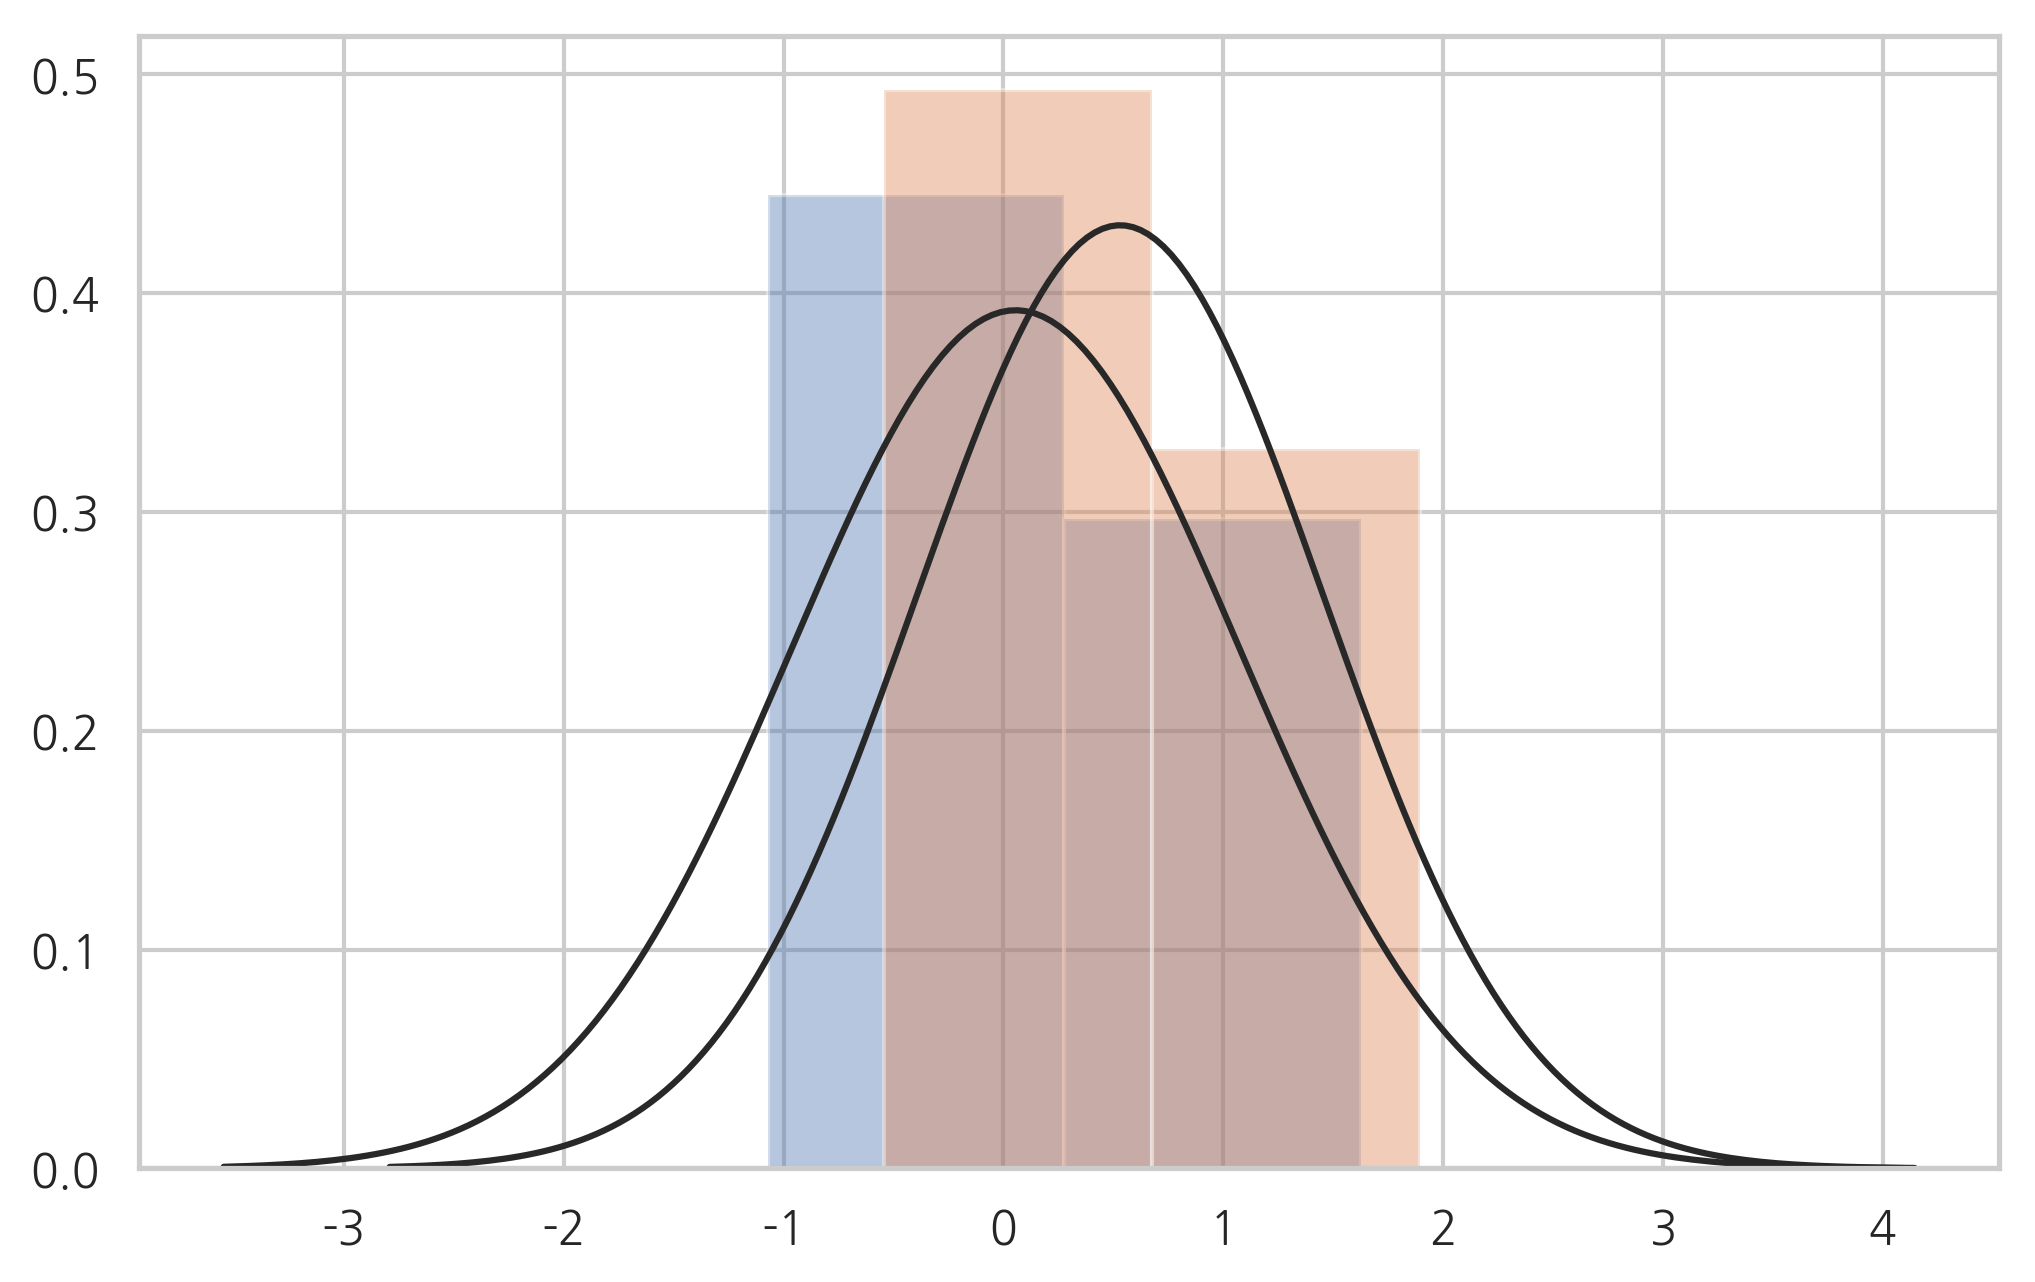

In [25]:
N = 5
mu_1 = 0
mu_2 = 0.5
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [26]:
sp.stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=-7.172338066173276, pvalue=0.0020008849290622677)

5 개의 데이터만으로도  두 평균이 다르다는 것을 유의 확률(p-value) 0.2%의 정확도로 알아내었음을 확인할 수 있다.

#### 연습 문제 7

어느 학급의 9월달 성적과 10월달 성적이 다음과 같다. 점수는 학생 번호 순으로 배열되어 있다.

* 9월 : 80점, 75점, 85점, 50점, 60점, 75점, 45점, 70점, 90점, 95점, 85점, 80점
* 10월: 90점, 70점, 90점, 65점, 80점, 85점, 65점, 75점, 80점, 90점, 95점, 95점

이 학급의 실력은 더 향상되었다고 이야기 할 수 있는가? 



## 카이 제곱 분산 검정 (Chi-Square Test for the Variance)

지금까지는 정규 분포의 기댓값을 비교하는 검정을 살펴보았다. 이제는 정규 분포의 분산에 대해 살펴보자.

카이 제곱 분산 검정(Chi-Square Test for the Variance)은 정규 분포의 샘플 분산 값은 정규화 하면 카이 제곱 분포를 따른다는 점을 이용하는 검정 방법이다.

그러나 SciPy는 카이 제곱 분산 검정에 대한 명령이 없으므로 `chi2` 클래스를 사용하여 직접 구현해야 한다.

In [27]:
def chi2var_test(x, sigma2=1):
    v = x.var(ddof=1)
    t = (len(x) - 1)*v/sigma2
    return t, sp.stats.chi2(df=len(x)-1).sf(np.abs(t))

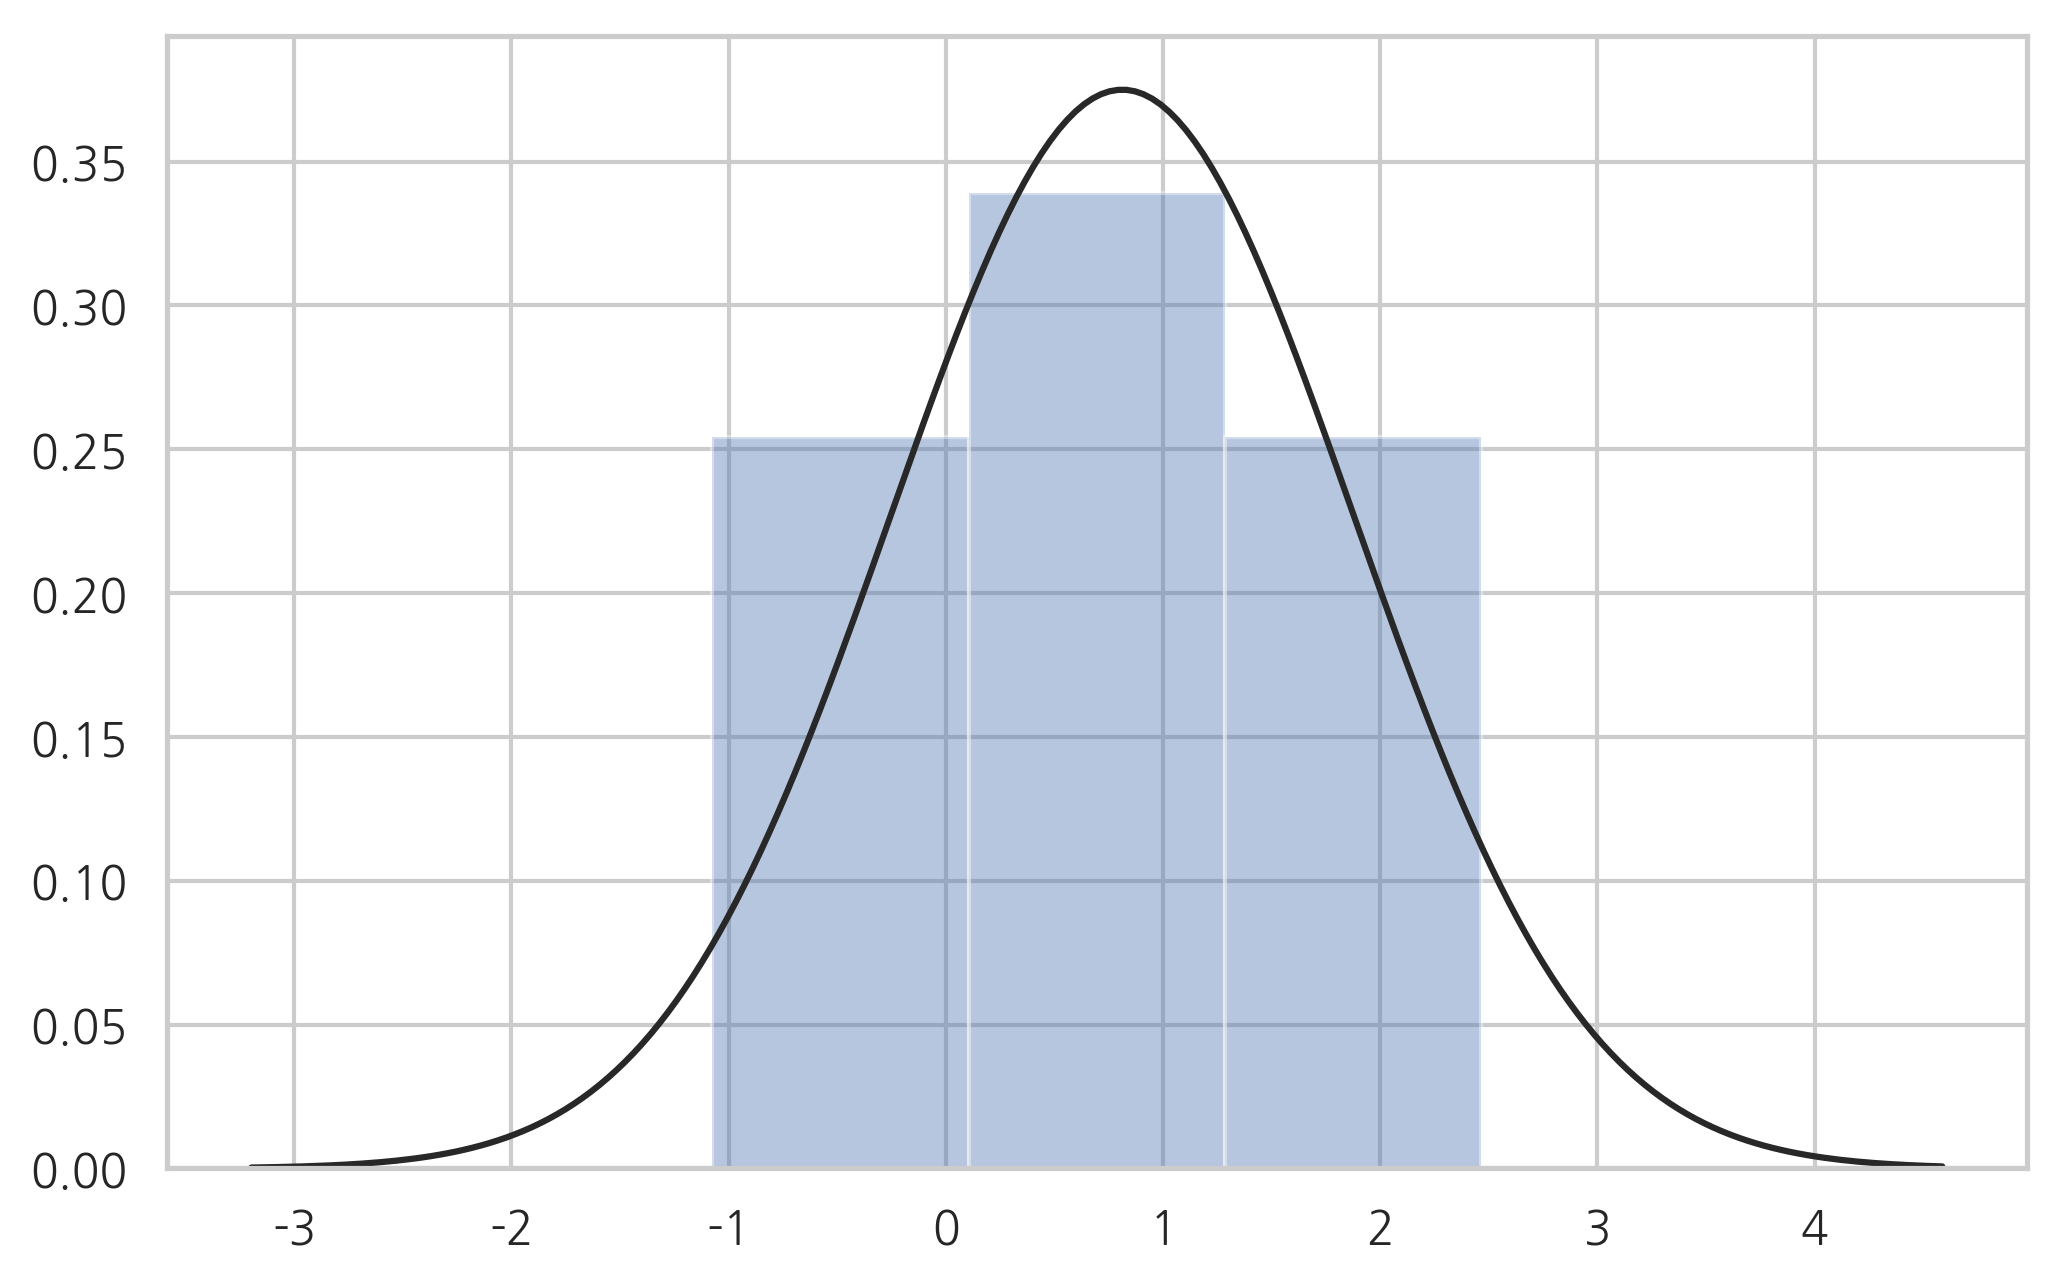

1.0637871321863899

In [28]:
N = 10
mu_0 = 0
sigma_0 = 1.1
np.random.seed(0)
x = sp.stats.norm(mu_0, sigma_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()
x.std()

In [29]:
chi2var_test(x)

(11.316430626053437, 0.2546412358476454)

## 등분산 검정 (Equal-variance test)

등분산 검정은 두 정규 분포로부터 생성된 두 개의 데이터 집합으로부터 두 정규 분포의 분산 모수가 같은지 확인하기 위한 검정이다. 가장 기본적인 방법은 F분포를 사용하는 것이지만 실무에서는 이보다 더 성능이 좋은 bartlett, fligner, levene 방법을 주로 사용한다. SciPy의 stats 서브패키지는 이를 위한  `bartlett`, `fligner`, `levene` 명령을 제공한다.

* scipy.stats.bartlett
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html
* scipy.stats.fligner
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html
* scipy.stats.levene
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html   

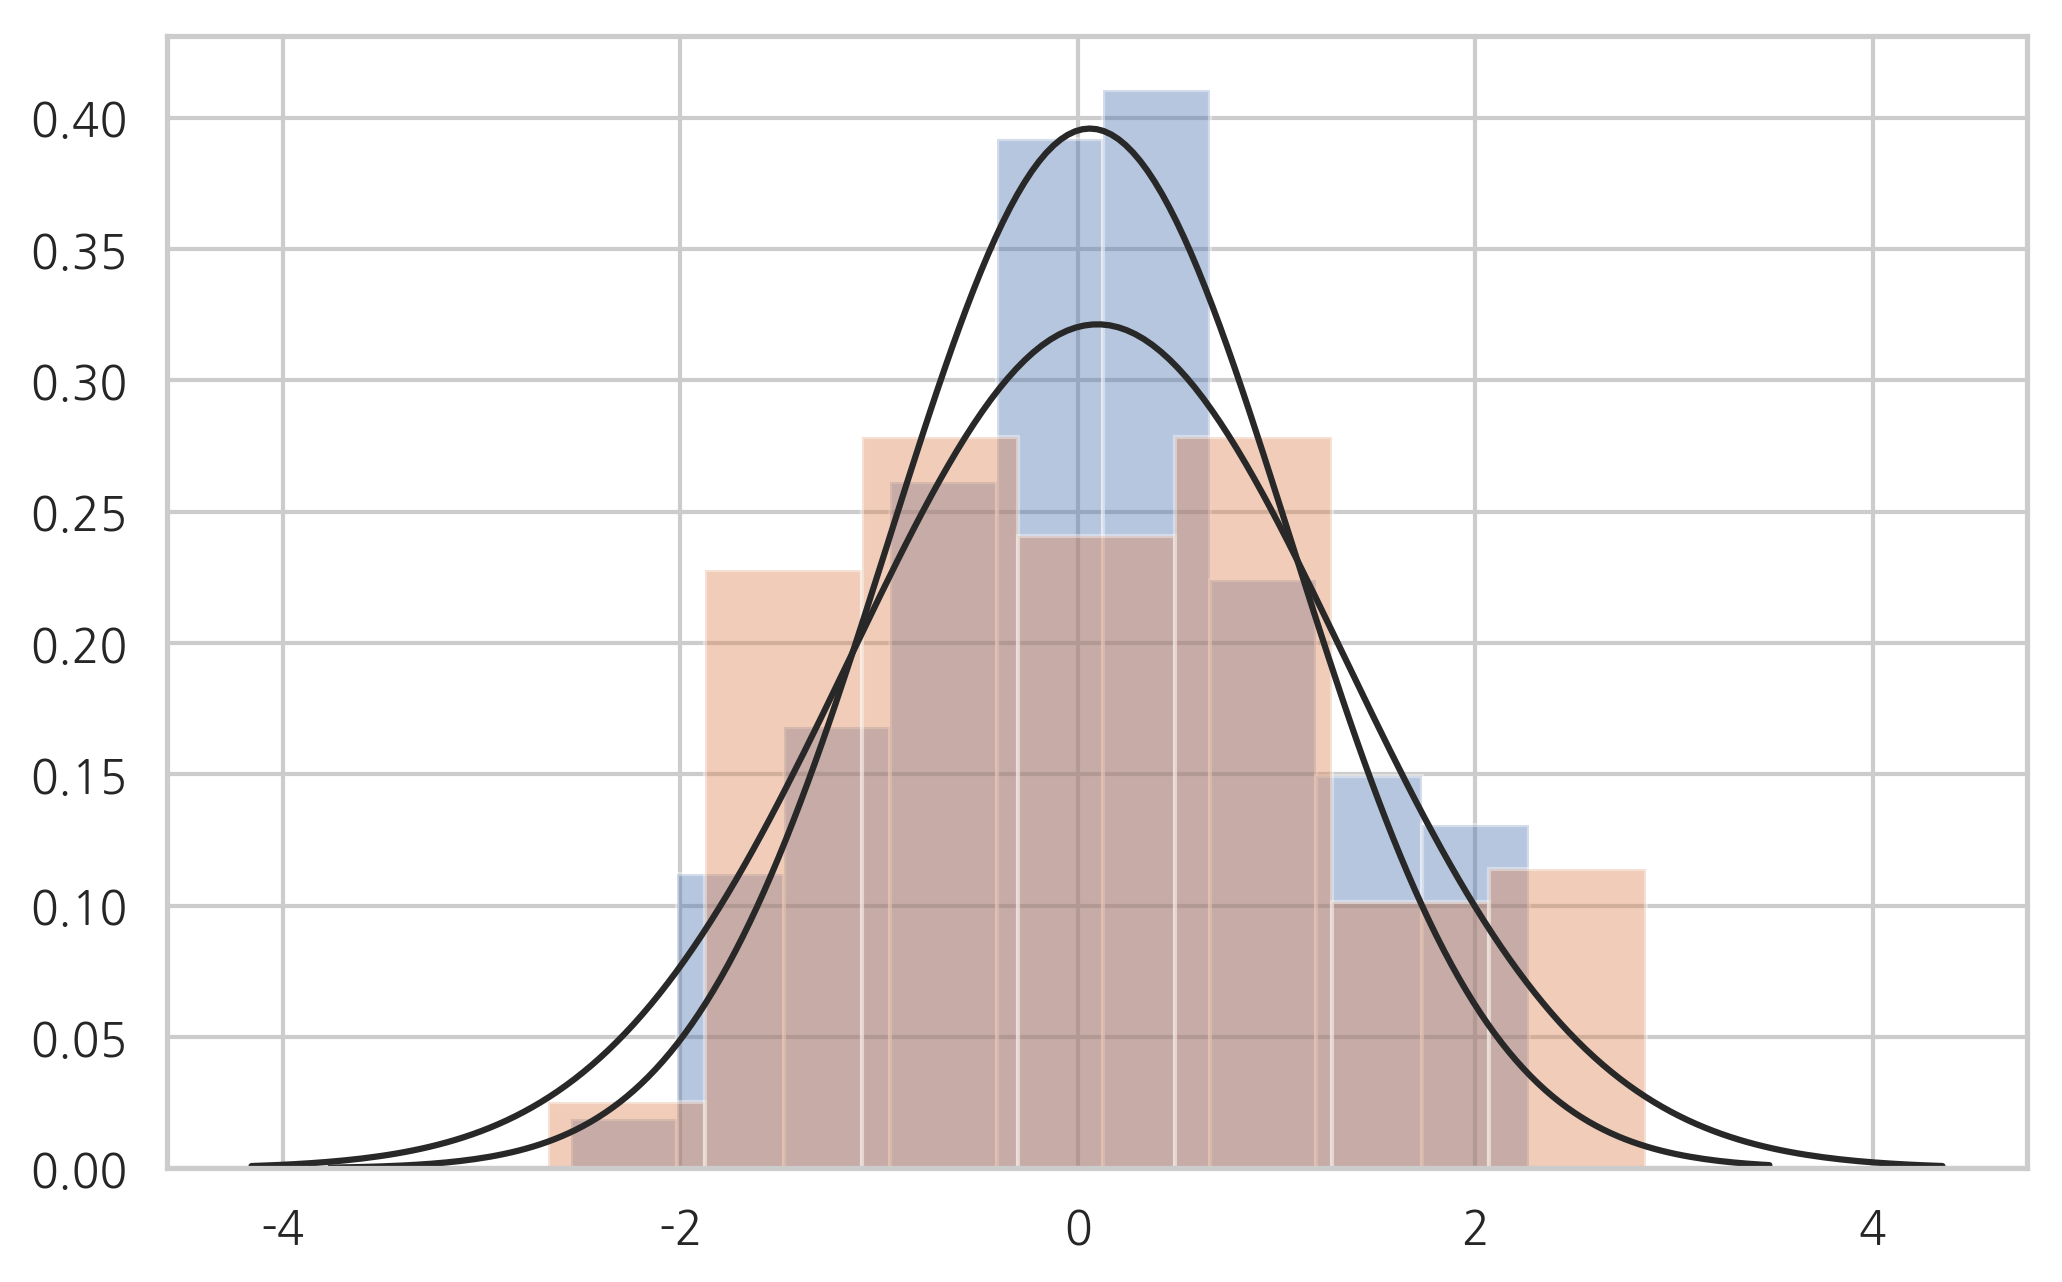

(1.0078822447165796, 1.2416003969261071)

In [30]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
np.random.seed(0)
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()
x1.std(), x2.std()

In [31]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=4.253473837232266, pvalue=0.039170128783651344)

In [32]:
sp.stats.fligner(x1, x2)

FlignerResult(statistic=7.224841990409457, pvalue=0.007190150106748367)

In [33]:
sp.stats.levene(x1, x2)

LeveneResult(statistic=7.680708947679437, pvalue=0.0061135154970207925)

## 정규성 검정

회귀 분석 등에서는 **확률 분포가 가우시안 정규 분포를 따르는지 아닌지를 확인**하는 것이 중요하다. 이러한 검정을 **정규성 검정(normality test)**이라고 한다. 정규성 분포는 중요한만큼 다양한 검정 방법들이 개발되어 있으며 Scipy 패키지 이외에 StatsModels 패키지도 다양한 정규성 검정 명령어를 제공한다. 

#### SciPy 에서 제공하는 정규성 검정 명령어

* Kolmogorov-Smirnov test
 * `scipy.stats.ks_2samp`
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

* Shapiro–Wilk test
 * `scipy.stats.shapiro`
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
     
* Anderson–Darling test
 * `scipy.stats.anderson`
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
 
* D'Agostino's K-squared test
 * `scipy.stats.mstats.normaltest`
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.normaltest.html

#### StatsModels에서 제공하는 정규성 검정 명령어

* Omnibus Normality test
 * `statsmodels.stats.stattools.omni_normtest`
    * http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.stattools.omni_normtest.html

* Jarque–Bera test
 * `statsmodels.stats.stattools.jarque_bera`
   * http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.stattools.jarque_bera.html

* Kolmogorov-Smirnov test
 * `statsmodels.stats.diagnostic.kstest_normal`
   * http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.kstest_normal.html

* Lilliefors test
 * `statsmodels.stats.diagnostic.lillifors`
   * http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.lillifors.html


이 중에서 Kolmogorov-Smirnov 검정은 사실 정규 분포에 국한되지 않고 두 샘플이 같은 분포를 따르는지 확인할 수 있는 방법이다.

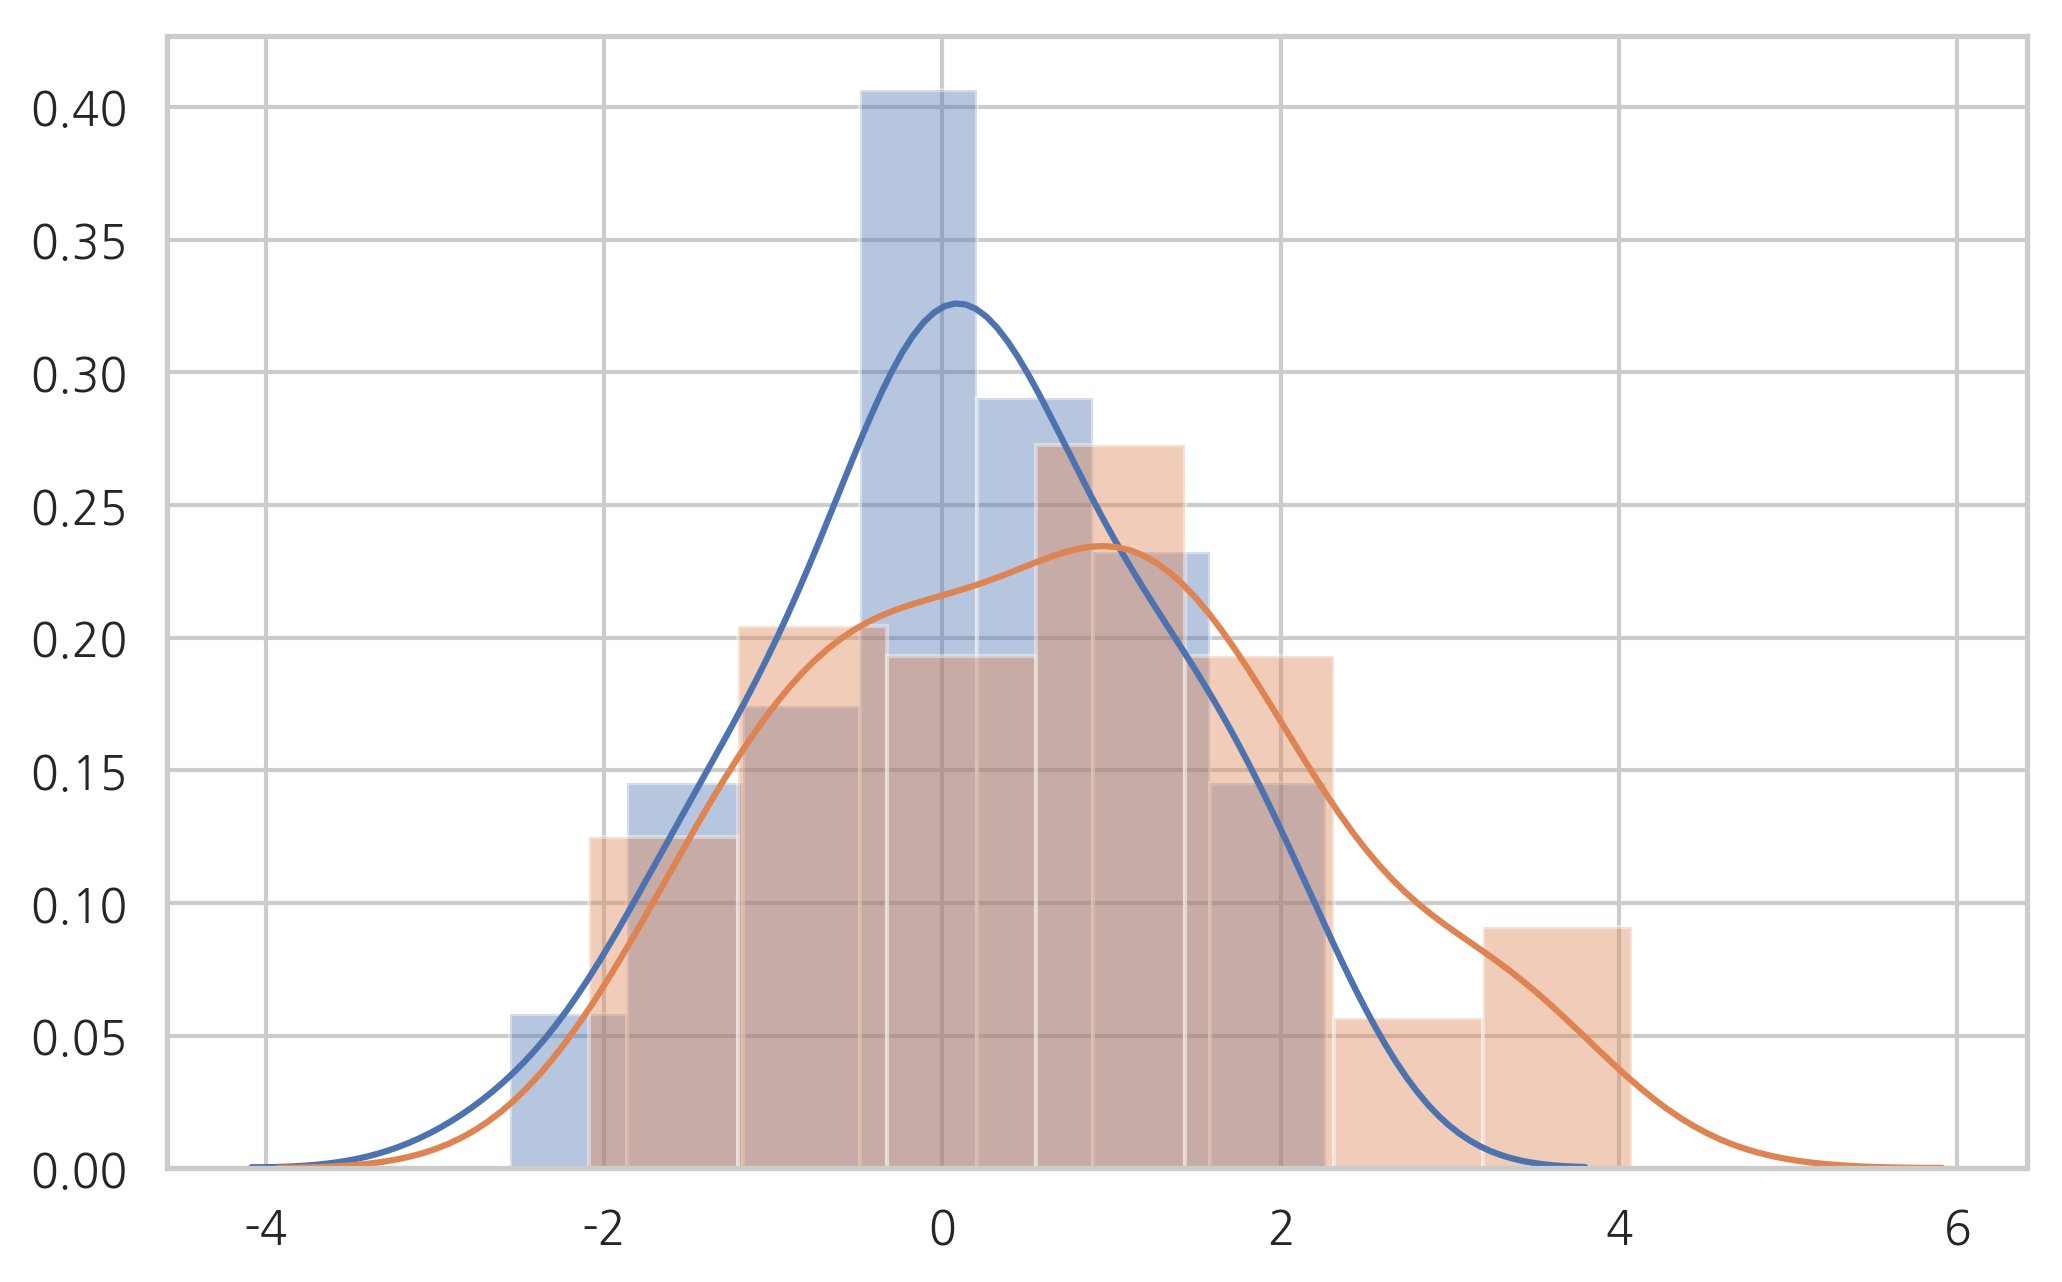

In [34]:
np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)
sns.distplot(x1)
sns.distplot(x2)
plt.show()

In [35]:
sp.stats.ks_2samp(x1, x2)

Ks_2sampResult(statistic=0.23000000000000004, pvalue=0.049516112814422863)

유의 확률이 4.95%로 만약 유의 수준이 5%라면 두 분포는 서로 다른 분포라고 볼 수 있다.